In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pew = pd.read_csv('data/pew_ratings.csv')
pew.Date = pd.to_datetime(pew['Date'] + ' 1, 2022', format='%B %d, %Y')

## Group data and make bar chart


In [3]:
def make_bar_chart(df):
    grouped_data = df.groupby(['issue', 'Party '])['Value'].mean().reset_index()

    #sns.set_theme(style="whitegrid")
    palette = {
        'Democrat': 'tab:blue',
        'Republican ': 'tab:red',
    }
    g = sns.catplot(
        data=grouped_data, kind="bar",
        x="issue", y="Value", hue="Party ", legend = None,
        palette=palette, aspect=1.5)
    plt.xticks(rotation=(50), ha='right')
    plt.legend(loc='upper right', title='Party of Voter')
    #sns.move_legend(ax, "center right")
    #g.despine(left=True)
    g.set_axis_labels("","Percentage who say issue is VERY important" )
    g.fig.suptitle("Average Pew Issue Polling for 2022")
    
    return g

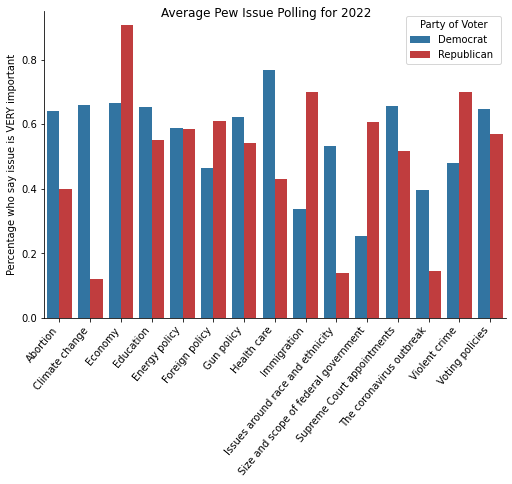

In [4]:
make_bar_chart(pew)